In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal
from scipy import fftpack


Bad key "text.kerning_factor" on line 4 in
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
MDD_dataset_Filenames = os.listdir('./full_dataset/MDD/EC/')
H_dataset_Filenames = os.listdir('./full_dataset/H/EC/')

MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/MDD/EC/' + str(filename), verbose=0)
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/H/EC/' + str(filename), verbose=0)
    H_dataset_list.append(data)  


In [3]:
MDD_dataframe = [] #MDD 환자의 데이터프레임 리스트
H_dataframe = [] #건강한 사람의 데이터프레임 리스트
y = []
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    MDD_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(1)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(temp)
    H_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(0)
y = np.asarray(y)    
MDD_dataframe[0]

,EEG Fp1-LE,EEG F3-LE,EEG C3-LE,EEG P3-LE,EEG O1-LE,EEG F7-LE,EEG T3-LE,EEG T5-LE,EEG Fz-LE,EEG Fp2-LE,EEG F4-LE,EEG C4-LE,EEG P4-LE,EEG O2-LE,EEG F8-LE,EEG T4-LE,EEG T6-LE,EEG Cz-LE,EEG Pz-LE,EEG A2-A1
0.000000,3.850294e-06,-0.000002,-0.000002,-5.500420e-07,-1.650126e-06,-7.450568e-06,4.500343e-07,-2.450187e-06,2.750210e-06,4.550347e-06,5.000381e-08,3.550271e-06,0.000007,2.500191e-07,5.450416e-06,0.000006,0.000003,2.500191e-07,0.000003,2.450187e-06
0.003906,2.250172e-06,-0.000004,-0.000001,3.500267e-07,-1.500114e-07,-7.750591e-06,-1.150088e-06,-2.450187e-06,4.500343e-07,2.650202e-06,-2.550195e-06,3.750286e-06,0.000008,2.050156e-06,8.550652e-06,0.000007,0.000004,-5.500420e-07,0.000006,2.050156e-06
0.007812,-5.000381e-08,-0.000005,-0.000002,8.500649e-07,5.500420e-07,-5.250401e-06,-2.650202e-06,-2.250172e-06,-2.250172e-06,5.000381e-08,-4.950378e-06,2.950225e-06,0.000008,3.450263e-06,8.950683e-06,0.000008,0.000005,-1.750134e-06,0.000006,2.350179e-06
0.011719,-2.350179e-06,-0.000005,-0.000002,1.050080e-06,9.500725e-07,-2.050156e-06,-3.750286e-06,-2.050156e-06,-4.450340e-06,-2.250172e-06,-5.950454e-06,2.350179e-06,0.000007,4.250324e-06,6.750515e-06,0.000006,0.000005,-2.750210e-06,0.000005,3.250248e-06
0.015625,-3.650278e-06,-0.000005,-0.000002,9.500725e-07,1.150088e-06,-1.500114e-07,-4.550347e-06,-1.650126e-06,-5.450416e-06,-3.450263e-06,-5.350408e-06,2.450187e-06,0.000005,4.750362e-06,3.250248e-06,0.000003,0.000006,-3.150240e-06,0.000003,4.450340e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119.980469,-1.350103e-06,0.000004,0.000003,5.500420e-07,1.150088e-06,2.650202e-06,2.150164e-06,7.500572e-07,3.450263e-06,1.850141e-06,3.050233e-06,4.500343e-07,0.000002,4.150317e-06,6.350484e-06,0.000006,0.000004,1.450111e-06,0.000002,1.950149e-06
119.984375,-1.050080e-06,0.000003,0.000004,1.950149e-06,2.150164e-06,2.450187e-06,3.050233e-06,2.050156e-06,2.050156e-06,7.500572e-07,2.250172e-06,-1.650126e-06,0.000002,3.950301e-06,4.750362e-06,0.000007,0.000004,5.000381e-08,0.000003,1.650126e-06
119.988281,4.500343e-07,0.000002,0.000005,3.950301e-06,2.650202e-06,2.450187e-06,5.250401e-06,3.350256e-06,1.750134e-06,5.000381e-08,2.850217e-06,-1.250095e-06,0.000004,3.850294e-06,2.350179e-06,0.000007,0.000005,1.500114e-07,0.000005,1.050080e-06
119.992188,2.050156e-06,0.000002,0.000007,6.050462e-06,2.650202e-06,2.550195e-06,7.550576e-06,4.650355e-06,2.250172e-06,-2.500191e-07,4.250324e-06,1.550118e-06,0.000006,3.750286e-06,4.500343e-07,0.000008,0.000006,1.550118e-06,0.000007,6.500496e-07


In [4]:
#MDD[26]환자 열 개수 조정
MDD_dataframe[26] = MDD_dataframe[26][MDD_dataframe[0].columns]

In [5]:
low_pass_filter = signal.firwin(101, cutoff=32, fs=256, pass_zero='lowpass')
high_pass_filter = signal.firwin(101, cutoff=0.5, fs=256, pass_zero='highpass')

In [6]:
for j in range(0, len(MDD_dataframe)):
    col = list(MDD_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], MDD_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        MDD_dataframe[j][col[i]] = clear_eeg

In [7]:
for j in range(0, len(H_dataframe)):
    col = list(H_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], H_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        H_dataframe[j][col[i]] = clear_eeg

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
all_dataframe = MDD_dataframe + H_dataframe


In [9]:
delta_pass_filter =  signal.firwin(101, cutoff=[0.5,4], fs=256, pass_zero='bandpass')
theta_pass_filter =  signal.firwin(101, cutoff=[4,8], fs=256, pass_zero='bandpass')
alpha_pass_filter =  signal.firwin(101, cutoff=[8,13], fs=256, pass_zero='bandpass')
beta_pass_filter =  signal.firwin(101, cutoff=[13,30], fs=256, pass_zero='bandpass')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

def band_power(channel):
    df = pd.DataFrame()
    df['delta'] = signal.lfilter(delta_pass_filter, [1.0], channel)
    df['theta'] = signal.lfilter(theta_pass_filter, [1.0], channel)
    df['alpha'] = signal.lfilter(alpha_pass_filter, [1.0], channel)
    df['beta'] = signal.lfilter(beta_pass_filter, [1.0], channel)
    
    return df


In [10]:
def eeg_band_power_seperate(input_dataframe, train):
    global scaler
    X = np.zeros((1,20,4,30720))
    for dataframe in input_dataframe:
        columns = list(dataframe.columns)
        band_power_list = np.zeros((1,4,30720))
        #band_power_list = band_power_list[newaxis,:,:]
        for i in range(len(columns)):
            ch = band_power(dataframe[dataframe.columns[i]])
            #if train == 1:
            #    scaler = Normalizer().fit(ch)
            #ch = scaler.transform(ch) #Nor
            
            ch = np.asarray(ch)
            band_power_list = np.vstack([band_power_list, ch.T[newaxis,:,:]])
        band_power_list = band_power_list[1:]
        X = np.vstack([X, band_power_list[newaxis,:,:,:]])
        #print(X.shape, end="/")
    return X

In [11]:
from sklearn.metrics import roc_curve
from keras import models
from keras import layers
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [12]:
def index_to_list(list, index):
    return [list[i] for i in index]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_dataframe, y, test_size=0.3, random_state = 7)

In [14]:
X_train = eeg_band_power_seperate(X_train, 1)

In [15]:
X_test = eeg_band_power_seperate(X_test, 0)

In [16]:
X_train = X_train[1:]
X_test = X_test[1:]
X_train.shape
y_test

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [20]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [18]:
def conv2d_model():
    model = models.Sequential()

            #1
    model.add(layers.Conv2D(64, 4, 4,
                            border_mode='same',
                            activation='relu',
                            input_shape=(20,4,30720)))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D(pool_size=(2,2),padding = 'same'))

            ##-- layer 4
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', recall_m, precision_m, f1_m])
    return model

In [37]:
model = conv2d_model()
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=13, batch_size=4, verbose=1, validation_data = (X_test, y_test))
history_dict = history.history

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Train on 40 samples, validate on 18 samples
Epoch 1/13
40/40 [==============================] - 2s 58ms/step - loss: 0.6941 - accuracy: 0.5250 - recall_m: 0.9667 - precision_m: 0.5250 - f1_m: 0.6390 - val_loss: 0.6918 - val_accuracy: 0.5556 - val_recall_m: 1.0000 - val_precision_m: 0.5500 - val_f1_m: 0.7048
Epoch 2/13
40/40 [==============================] - 2s 49ms/step - loss: 0.6929 - accuracy: 0.5250 - recall_m: 0.7500 - precision_m: 0.5250 - f1_m: 0.6057 - val_loss: 0.6915 - val_accuracy: 0.5556 - val_recall_m: 1.0000 - val_precision_m: 0.5500 - val_f1_m: 0.7048
Epoch 3/13
40/40 [==============================] - 2s 49ms/step - loss: 0.6926 - accuracy: 0.5250 - recall_m: 1.0000 - precision_m: 0.5083 - f1_m: 0.6414 - val_loss: 0.6911 - val_accuracy: 0.5556 - val_recall_m: 1.0000 - val_precision_m: 0.5500 - val_f1_m: 0.7048
Epoch 4/13
40/40 [==============================] - 2s 49ms/step - loss: 0.6937 - accuracy: 0.5000 - recall_m: 1.0000 - precision_m: 0.5000 - f1_m: 0.6314 - val_

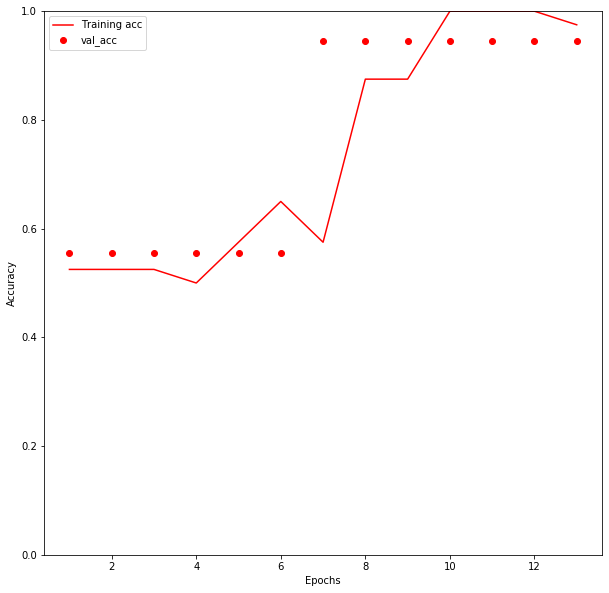

In [41]:

epochs = range(1, len(loss) + 1)
val_acc = history_dict['val_accuracy']
acc = history_dict['accuracy']
plt.figure(figsize=(10,10))
    
plt.plot(epochs, acc, 'r', label='Training acc')

plt.plot(epochs, val_acc, 'ro', label='val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()

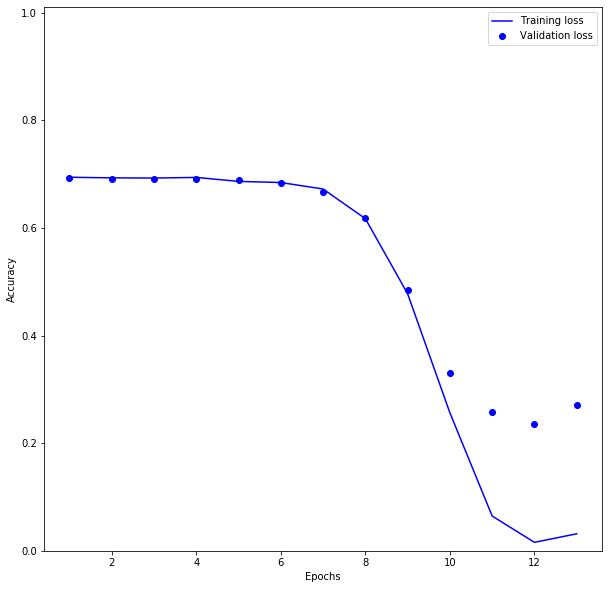

In [40]:
loss = history_dict['loss']   
val_loss = history_dict['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

In [42]:
model.predict_proba(X_test), y_test

(array([[0.00872   ],
        [0.00872   ],
        [0.00872   ],
        [0.99463636],
        [0.00872   ],
        [0.9947573 ],
        [0.99359894],
        [0.00872   ],
        [0.00872   ],
        [0.00872   ],
        [0.99348164],
        [0.99524814],
        [0.9952933 ],
        [0.99491876],
        [0.00872   ],
        [0.994547  ],
        [0.00872   ],
        [0.99494153]], dtype=float32),
 array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]))

# K-fold Val

In [19]:
accuracy_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
import keras.backend.tensorflow_backend as Keras_GPU
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=3)

for i in range(1):
    for train, test in kfold.split(all_dataframe, y):
        X_train = index_to_list(all_dataframe, train)
        y_train = y[train]
        X_test = index_to_list(all_dataframe, test)
        y_test = y[test]


        X_train = eeg_band_power_seperate(X_train, 1)
        X_test = eeg_band_power_seperate(X_test, 0)

        X_train = X_train[1:]
        X_test = X_test[1:]

        model = conv2d_model()


        model.compile(optimizer='Adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', recall_m, precision_m, f1_m])

        model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

        scores = model.evaluate(X_test, y_test, verbose=0)

        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
        print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
        print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
        print("\n")
        accuracy_scores.append(scores[1] * 100)
        prec_scores.append(scores[2])
        rec_scores.append(scores[3])
        f1_scores.append(scores[4])
    
print("%.2f (+/- %.2f%%)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(prec_scores), np.std(prec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(rec_scores), np.std(rec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
    
    
    
    
    
    

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Epoch 1/20
46/46 [==============================] - 5s 98ms/step - loss: 0.6944 - accuracy: 0.4783 - recall_m: 0.8889 - precision_m: 0.4931 - f1_m: 0.6206
Epoch 2/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6934 - accuracy: 0.5000 - recall_m: 0.9167 - precision_m: 0.4792 - f1_m: 0.6143
Epoch 3/20
46/46 [==============================] - 2s 38ms/step - loss: 0.6953 - accuracy: 0.4130 - recall_m: 0.6319 - precision_m: 0.5000 - f1_m: 0.4770
Epoch 4/20
46/46 [==============================] - 2s 40ms/step - loss: 0.6932 - accuracy: 0.5217 - recall_m: 0.4444 - precision_m: 0.4236 - f1_m: 0.4159
Epoch 5/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6910 - accuracy: 0.4783 - recall_m: 0.9028 - precision_m: 0.4931 - f1_m: 0.6067
Epoch 6/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6853 - accuracy: 0.5435 - recall_m: 1.0000 - precision_m: 0.5486 - f1_m: 0.6734
Epoch 7/20
46/46 [==============================] - 2s 39ms/step - los

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Epoch 1/20
46/46 [==============================] - 2s 45ms/step - loss: 0.6937 - accuracy: 0.5217 - recall_m: 1.0000 - precision_m: 0.5417 - f1_m: 0.6714
Epoch 2/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6926 - accuracy: 0.5217 - recall_m: 0.9167 - precision_m: 0.5417 - f1_m: 0.6643
Epoch 3/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6925 - accuracy: 0.5217 - recall_m: 0.9167 - precision_m: 0.5208 - f1_m: 0.6484
Epoch 4/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6913 - accuracy: 0.5217 - recall_m: 0.9167 - precision_m: 0.5208 - f1_m: 0.6548
Epoch 5/20
46/46 [==============================] - 2s 40ms/step - loss: 0.6776 - accuracy: 0.5217 - recall_m: 1.0000 - precision_m: 0.5208 - f1_m: 0.6532
Epoch 6/20
46/46 [==============================] - 2s 40ms/step - loss: 0.6588 - accuracy: 0.5217 - recall_m: 0.9167 - precision_m: 0.5000 - f1_m: 0.6238
Epoch 7/20
46/46 [==============================] - 2s 40ms/step - los

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Epoch 1/20
46/46 [==============================] - 2s 47ms/step - loss: 0.6936 - accuracy: 0.5000 - recall_m: 0.8889 - precision_m: 0.5556 - f1_m: 0.6262
Epoch 2/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6944 - accuracy: 0.5652 - recall_m: 0.9167 - precision_m: 0.5833 - f1_m: 0.6921
Epoch 3/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6900 - accuracy: 0.5652 - recall_m: 0.9167 - precision_m: 0.5417 - f1_m: 0.6516
Epoch 4/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6860 - accuracy: 0.5652 - recall_m: 0.8333 - precision_m: 0.5417 - f1_m: 0.6302
Epoch 5/20
46/46 [==============================] - 2s 41ms/step - loss: 0.6819 - accuracy: 0.5652 - recall_m: 0.9167 - precision_m: 0.5417 - f1_m: 0.6683
Epoch 6/20
46/46 [==============================] - 2s 40ms/step - loss: 0.6692 - accuracy: 0.5652 - recall_m: 1.0000 - precision_m: 0.5833 - f1_m: 0.7198
Epoch 7/20
46/46 [==============================] - 2s 39ms/step - los

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Epoch 1/20
47/47 [==============================] - 2s 51ms/step - loss: 0.6929 - accuracy: 0.5319 - recall_m: 0.7222 - precision_m: 0.4375 - f1_m: 0.5103
Epoch 2/20
47/47 [==============================] - 2s 39ms/step - loss: 0.6956 - accuracy: 0.4043 - recall_m: 0.6667 - precision_m: 0.4722 - f1_m: 0.4972
Epoch 3/20
47/47 [==============================] - 2s 38ms/step - loss: 0.6897 - accuracy: 0.5957 - recall_m: 0.8333 - precision_m: 0.6319 - f1_m: 0.6667
Epoch 4/20
47/47 [==============================] - 2s 38ms/step - loss: 0.6927 - accuracy: 0.4894 - recall_m: 0.7847 - precision_m: 0.5069 - f1_m: 0.5913
Epoch 5/20
47/47 [==============================] - 2s 39ms/step - loss: 0.6930 - accuracy: 0.4468 - recall_m: 0.8125 - precision_m: 0.4931 - f1_m: 0.5532
Epoch 6/20
47/47 [==============================] - 2s 40ms/step - loss: 0.6855 - accuracy: 0.5319 - recall_m: 0.9792 - precision_m: 0.5417 - f1_m: 0.6587
Epoch 7/20
47/47 [==============================] - 2s 40ms/step - los

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(20, 4, 30..., padding="same")`
  


Epoch 1/20
47/47 [==============================] - 2s 43ms/step - loss: 0.6938 - accuracy: 0.3404 - recall_m: 0.2917 - precision_m: 0.2292 - f1_m: 0.2278
Epoch 2/20
47/47 [==============================] - 2s 40ms/step - loss: 0.6925 - accuracy: 0.5319 - recall_m: 0.0833 - precision_m: 0.1667 - f1_m: 0.1111
Epoch 3/20
47/47 [==============================] - 2s 40ms/step - loss: 0.6903 - accuracy: 0.5106 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00
Epoch 4/20
47/47 [==============================] - 2s 38ms/step - loss: 0.6955 - accuracy: 0.4255 - recall_m: 0.0833 - precision_m: 0.1667 - f1_m: 0.1111
Epoch 5/20
47/47 [==============================] - 2s 38ms/step - loss: 0.6869 - accuracy: 0.5957 - recall_m: 0.5278 - precision_m: 0.6528 - f1_m: 0.5333
Epoch 6/20
47/47 [==============================] - 2s 38ms/step - loss: 0.6944 - accuracy: 0.4681 - recall_m: 0.3194 - precision_m: 0.3889 - f1_m: 0.3194
Epoch 7/20
47/47 [==============================] - 2s 38m

In [16]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 4, 64)         31457344  
_________________________________________________________________
dropout_10 (Dropout)         (None, 20, 4, 64)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 2, 64)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                81984     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_39 (Dense)             (None, 128)             